In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import imageio as iio

In [36]:
from os import listdir
#from sklearn.feature_extraction.image import extract_patches_2d
#from sklearn.decomposition import PCA
#from sklearn.cluster import KMeans
#from joblib import Parallel, delayed
#from skimage import feature
#from patchify import patchify


In [37]:
filename = str(input())
path = 'Braile Dataset\\' + filename

a1.JPG0dim.jpg


# Pré-Processamento
Nessa etapa vamos pegar a imagem lida na celula anterior, deixa-la cinza e binarizar a imagem


In [45]:
#Tasks
#Filtro default que estamos usando, reduz o barulho bem
def meanFilter(img, filter_size):
    
    x = img.shape[0]
    y = img.shape[1]
    
    pad_size = int(((filter_size - 1) / 2))
    
    img_pad = np.pad(img, (pad_size, pad_size), constant_values = 255)

    for i in range (x):
        for j in range(y):
            img[i, j] = img_pad[i: i + filter_size,j: j + filter_size].sum()/img_pad[i: i + filter_size,j : j + filter_size].size 
            
    return img

In [39]:
#Filtro alternativo, para eventualidade de mudar
def medianFilter(img, filter_size):
    
    x = img.shape[0]
    y = img.shape[1]
    
    pad_size = int(((filter_size - 1) / 2))
    
    img_pad = np.pad(img, (pad_size, pad_size), constant_values = 255)

    for i in range (x):
        for j in range(y):
            W = np.sort(img_pad[i: i + filter_size,j: j + filter_size].flatten())
            img[i,j] = np.median(W)
            
    return img 

In [40]:
# Normalização min max
def min_max(img):
    min = np.amin(img)
    max = np.amax(img)
    
    img_res = (img - min)/(max - min)
    
    return img_res;

In [42]:
#Transforma a imagem em gray-scale
def Luminance(img):
    img = np.array(img, copy=True).astype(float)
    # computing conversion
    new_img = np.zeros((img.shape[0], img.shape[1]))
    new_img = img[:,:,0]*0.299 + img[:,:,1]*0.587 + img[:,:,2]*0.114
    new_img = min_max(new_img)
    
    return new_img

In [58]:
#Abre a imagem
img_src = iio.imread(path)

#Deixa a imagem cinza e normaliza para o intervalo de 0 a 255
img_gray = Luminance(img_src)
img_gray = min_max(img_gray)
img_gray = (img_gray*255).astype(np.uint8)

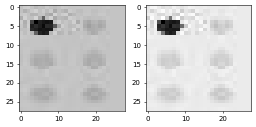

In [60]:
plt.figure(dpi=50) # change image size

plt.subplot(121) # imagem aberta
plt.imshow(img_src, cmap = "gray")

plt.subplot(122) # grayscale + normalizacao [0-255]
plt.imshow(img_gray, cmap = "gray")


In [62]:
#Binariza, deixa o fundo preto e os circulos brancos, para a operação FindK
def Binarize(img, T):
    return np.where(img > T, 0, 1);

In [63]:
# Usa o filtro para reduzir barulho
img_filtered = meanFilter(img_gray,5)

img_bin = Binarize(img_filtered, 175)

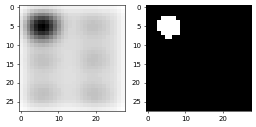

In [65]:
plt.figure(dpi=50) # change image size

plt.subplot(121) # barulho filtrado (blur)
plt.imshow(img_filtered, cmap = "gray")

plt.subplot(122) # binary
plt.imshow(img_bin, cmap = "gray")

In [67]:
#Para a k-means, que vai achar os centroides da nova imagem a ser gerada,
#corta a imagem em seis, seria interessante garantir que a imagem está orientada e
#posicionada corretamente antes de fazer isso

def FindK(img):
    x,y = img.shape
    stepx = x// 2
    stepy = y// 3
    
    k = 0
    
    img_cut = []
    
    #Corta a imagem em 6
    for i in range(0, y, stepy):
        for j in range(0, x, stepx):
            img_cut.append(img[i : i + stepy, j : j + stepx])

    
    for i in range(6):
        if(img_cut[i].sum() > 0):
            k+=1
    
    plt.figure(2)
    
    plt.subplot(231)
    plt.imshow(img_cut[0], cmap = "gray")

    plt.subplot(232)
    plt.imshow(img_cut[1], cmap = "gray")
    
    plt.subplot(233)
    plt.imshow(img_cut[2], cmap = "gray")
    
    plt.subplot(234)
    plt.imshow(img_cut[3], cmap = "gray")

    plt.subplot(235)
    plt.imshow(img_cut[4], cmap = "gray")

    plt.subplot(236)
    plt.imshow(img_cut[5], cmap = "gray")    
    return k;


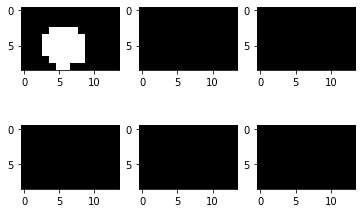

In [66]:
k = FindK(img_bin)

#Agora só codar uma k-means 

In [68]:
#Potencial problema, imagens não tem a mesma dimensao, reshape pode dar errado
#Seria legal com base na imagem binarizada gerar um nova imagem com um circulo melhor e na escala desejada
# Escala desejada = Escala das imagens no dicionario
#def euclidian_Distance(img_test, img_dict):
#    return np.sqrt(np.sum(np.square(img_test - img_dict)))


In [69]:
#Funcional
#    plt.subplot(231)
#    plt.imshow(img_cut[0], cmap = "gray")

#    plt.subplot(232)
#    plt.imshow(img_cut[1], cmap = "gray")
    
#    plt.subplot(233)
#    plt.imshow(img_cut[2], cmap = "gray")
    
#    plt.subplot(234)
#    plt.imshow(img_cut[3], cmap = "gray")

#    plt.subplot(235)
#    plt.imshow(img_cut[4], cmap = "gray")

#    plt.subplot(236)
#    plt.imshow(img_cut[5], cmap = "gray")    